실제 모델을 학습하는데 사용이 되었던 소스 코드입니다

# 환경설정

In [1]:
!pip install git
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
!bash Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab190912.sh

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 75 (delta 33), reused 21 (delta 5), pack-reused 0
Unpacking objects: 100% (75/75), done.
Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.1MB/s 
     |████████████████████████████████| 460kB 54.2MB/s 
     |████████████████████████████████| 92kB 15.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
-

In [ ]:
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 145105 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# 데이터 전처리

In [2]:
from konlpy.tag import Mecab
from tensorflow import keras

import os
os.chdir('/content/drive/My Drive/open/')

import pandas as pd
import re

train_df = pd.read_csv('news_train.csv')
content = train_df['content'].tolist()
title = train_df['title'].tolist()

nlp = Mecab()

In [3]:
re_form = "[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]"

def preporcess(content: list):
    re_content = []
    for item in content:
        # re_str = re.sub(re_form, "", item)
        re_str = item
        result = [item[0] + "/" + item[1] for item in nlp.pos(re_str)]
        result_str = " ".join(result)
        re_content.append(result_str)

    return re_content

content = preporcess(content)
title = preporcess(title)

In [ ]:
print(content[:10])

['[/SSO 이/MM 데일리/NNP MARKETPOINT/SL ]/SSC 15/SN :/SC 32/SN 현재/NNG 코스닥/NNG 기관/NNG 678/SN 억/NR 순매도/NNG', '"/SY 실적/NNG 기반/NNG "/SY 저/MM 가/NNG 에/JKB 매집/NNG 해야/XSV+EC 할/VX+ETM 8/SN 월/NNBC 급등/NNG 유망주/NNG TOP/SL 5/SN 전격/NNG 공개/NNG', '하이스/NNP 탁론/NNG ,/SC 선취/NNG 수수료/NNG 없/VA 는/ETM 월/NNG 0/SN ./SY 4/SN %/SY 최저/NNG 금리/NNG 상품/NNG 출시/NNG', '종합/NNG 경제/NNG 정보/NNG 미디어/NNG 이/MM 데일리/NNP -/SY 무단/NNG 전재/NNG &/SY 재/XPN 배포/NNG 금지/NNG', '전국/NNG 적/XSN 인/VCP+ETM 소비/NNG 붐/NNG 조성/NNG 에/JKB 기여/NNG 할/XSV+ETM 예정/NNG', '[/SSO 이/MM 데일리/NNP 권오석/NNP 기자/NNG ]/SSC 중소/NNG 벤처/NNG 기업/NNG 부/NNG (/SSO 이하/NNG 중기/NNG 부/NNG )/SSC 는/JX 대한민국/NNP 동행/NNG 세일/NNG 에/JKB 7/SN 개/NNBC TV/SL 홈/NNG 쇼핑/NNG 사/NNG 가/JKS 홍보/NNG 와/JC 판매/NNG 에/JKB 동참/NNG 한다고/XSV+EC 26/SN 일/NNBC 밝혔/VV+EP 다/EC', '대한민국/NNP 동행/NNG 세일/NNG 은/JX 라이브/NNG 커머스/NNG ,/SC 언/VV+ETM 택트/NNP 콘서트/NNG ,/SC O/SL 2/SN O/SL 행사/NNG 연계/NNG 등/NNB 비/XPN 대면/NNG 이/VCP 라는/ETM 새로운/VA+ETM 형태/NNG 의/JKG 소비/NNG 촉진/NNG 행사/NNG 다/VCP+EC', '6/SN 개/NNBC 권역/NNG 에서/JKB 의/JKG 현장/NNG 행사/NNG 와/JC 온/MM ·/SC

In [ ]:
from wordcloud import WordCloud

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

def token_getter(content: list):
    re_content = []
    for item in content:
        re_str = re.sub(re_form, "", item)

        result = [item[0] for item in nlp.pos(re_str)]
        result_str = " ".join(result)
        re_content.append(result_str)

    return re_content

tk_content = token_getter(train_df['content'].tolist())
tk_title = token_getter(train_df['title'].tolist())

wc = WordCloud(
    font_path=fontpath,
    width=800, 
    height=400,
    background_color="white",    
)
wc = wc.generate_from_text(" ".join(tk_content))

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wc = WordCloud(
    font_path=fontpath,
    width=800, 
    height=400,
    background_color="white",    
)
wc = wc.generate_from_text(" ".join(tk_title))

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

OSError: ignored

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

vocab_size = 30000
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(content + title)

tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

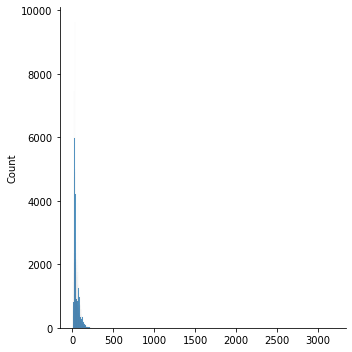

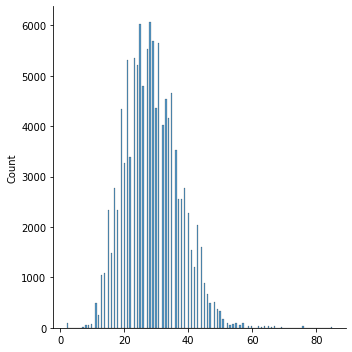

85


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

content_sequences = tokenizer.texts_to_sequences(content)
title_sequences = tokenizer.texts_to_sequences(title)

content_length = []
for arr in content_sequences:
    content_length.append(len(arr))

title_length = []
for arr in title_sequences:
    title_length.append(len(arr))

# 컨텐츠 길이
sns.displot(content_length)
plt.show()

# 타이틀 길이
sns.displot(title_length)
plt.show()

# content_max_len = max(content_length)
content_max_len = 300 # 길이기 2500이 넘어가는 이상치 존재, 평균적으로는 그보다 한참 밑
title_max_len = max(title_length)
print(title_max_len)

In [ ]:
print(content_max_len, title_max_len)

300 85


In [10]:
# train 
train_sequences = tokenizer.texts_to_sequences(content)
x1_train = pad_sequences(train_sequences, maxlen=content_max_len) # content
train_sequences = tokenizer.texts_to_sequences(title)
x2_train = pad_sequences(train_sequences, maxlen=title_max_len) # title

y_train = train_df['info'].to_numpy()

# 학습 모델


In [12]:
# 2020-11-30 15:42:55 0.9722739981
# loss: 0.0294 - acc: 0.9913 - val_loss: 0.0479 - val_acc: 0.9801
# kernel_size = [3, 6, 9]
# filter = 32
# embedding_size = 32

# 2020-12-04 15:09:39 0.97895
# loss: 0.0357 - acc: 0.9887 - val_loss: 0.0301 - val_acc: 0.9880
# kernel_size = [3, 6, 12]
# filter = 32
# embedding_size = 128

# loss: 0.0506 - acc: 0.9826 - val_loss: 0.0330 - val_acc: 0.9880
# kernel_size = [3, 6, 12]
# filter = 64
# embedding_size = 128

# loss: 0.0298 - acc: 0.9909 - val_loss: 0.0279 - val_acc: 0.9896
# kernel_size = [3, 12, 24]
# filter = 32
# embedding_size = 128

# 0.9781764523
# loss: 0.0540 - acc: 0.9821 - val_loss: 0.0308 - val_acc: 0.9897 

def build_model():
    kernel_size = [3, 6, 12]
    filter = 32
    embedding_size = 128

    def multi_kernel(filter_size, input_layer):
        conv_blocks = []

        for ks in kernel_size:
            conv = keras.layers.Conv1D(filter_size, ks, padding="valid", activation="relu", strides=1)(input_layer)
            pool = keras.layers.GlobalMaxPooling1D()(conv)

            conv_blocks.append(pool)

        return conv_blocks

    content_input = keras.layers.Input((content_max_len,))
    content_embedding = keras.layers.Embedding(vocab_size, embedding_size)(content_input)
    content_do = keras.layers.Dropout(.5)(content_embedding)
    content_convs = multi_kernel(filter, content_do)

    title_input = keras.layers.Input((title_max_len,))
    title_embedding = keras.layers.Embedding(vocab_size, embedding_size)(title_input)
    title_do = keras.layers.Dropout(.5)(title_embedding)
    title_convs = multi_kernel(filter, title_do)

    concatenate = keras.layers.Concatenate()(content_convs + title_convs)
    do1 = keras.layers.Dropout(.3)(concatenate)
    output = keras.layers.Dense(1, activation='sigmoid')(do1)

    model = keras.models.Model([content_input, title_input], output)
    # model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['acc'])
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(2e-4), metrics=['acc'])

    return model

In [ ]:
# kernel_size = [3, 6, 12]
# filter = 64
# embedding_size = 128

# def multi_kernel(filter_size, input_layer):
#     conv_blocks = []

#     for ks in kernel_size:
#         conv1 = keras.layers.Conv1D(filter_size, ks, padding="valid", activation="relu", strides=1)(input_layer)
#         pool = keras.layers.MaxPool1D()(conv1)
#         drop = keras.layers.Dropout(.5)(pool)
#         conv2 = keras.layers.Conv1D(filter_size, ks, padding="valid", activation="relu", strides=1)(drop)
#         max_pool = keras.layers.GlobalMaxPool1D()(conv2)

#         conv_blocks.append(max_pool)

#     return conv_blocks

# content_input = keras.layers.Input((content_max_len,))
# content_embedding = keras.layers.Embedding(vocab_size, embedding_size)(content_input)
# content_do = keras.layers.Dropout(.5)(content_embedding)
# content_convs = multi_kernel(filter, content_do)

# title_input = keras.layers.Input((title_max_len,))
# title_embedding = keras.layers.Embedding(vocab_size, embedding_size)(title_input)
# title_do = keras.layers.Dropout(.5)(title_embedding)
# title_convs = multi_kernel(filter, title_do)

# concatenate = keras.layers.Concatenate()(content_convs + title_convs)
# do1 = keras.layers.Dropout(.3)(concatenate)
# output = keras.layers.Dense(1, activation='sigmoid')(do1)

# model = keras.models.Model([content_input, title_input], output)
# # model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['acc'])
# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(2e-4), metrics=['acc'])
# model.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
input_21 (InputLayer)           [(None, 85)]         0                                            
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 300, 128)     3840000     input_20[0][0]                   
__________________________________________________________________________________________________
embedding_20 (Embedding)        (None, 85, 128)      3840000     input_21[0][0]                   
______________________________________________________________________________________

In [13]:
model = build_model()
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
hist = model.fit([x1_train, x2_train], y_train, batch_size=1024, epochs=40, validation_split=0.2, shuffle=True, verbose=1, callbacks=[es])

Epoch 1/40
93/93 [==============================] - 32s 251ms/step - loss: 0.6695 - acc: 0.5618 - val_loss: 0.4675 - val_acc: 0.9624
Epoch 2/40
93/93 [==============================] - 22s 239ms/step - loss: 0.4427 - acc: 0.8508 - val_loss: 0.1114 - val_acc: 0.9955
Epoch 3/40
93/93 [==============================] - 22s 241ms/step - loss: 0.1824 - acc: 0.9427 - val_loss: 0.0457 - val_acc: 0.9933
Epoch 4/40
93/93 [==============================] - 22s 241ms/step - loss: 0.1092 - acc: 0.9627 - val_loss: 0.0368 - val_acc: 0.9909
Epoch 5/40
93/93 [==============================] - 23s 243ms/step - loss: 0.0797 - acc: 0.9726 - val_loss: 0.0322 - val_acc: 0.9904
Epoch 6/40
93/93 [==============================] - 23s 243ms/step - loss: 0.0641 - acc: 0.9783 - val_loss: 0.0325 - val_acc: 0.9891
Epoch 7/40
93/93 [==============================] - 23s 244ms/step - loss: 0.0538 - acc: 0.9814 - val_loss: 0.0307 - val_acc: 0.9889
Epoch 8/40
93/93 [==============================] - 23s 245ms/step - 

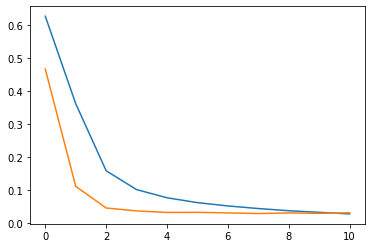

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [15]:
model.save('nh-model')

INFO:tensorflow:Assets written to: nh-model/assets


In [16]:
import time 
start_time = time.time()

# test
test_df = pd.read_csv('news_test.csv')
test_content = test_df['content'].tolist()
test_title = test_df['title'].tolist()
print(time.time() - start_time)

test_content = preporcess(test_content)
test_title = preporcess(test_title)
print(time.time() - start_time)

test_sequences = tokenizer.texts_to_sequences(test_content)
x1_test = pad_sequences(test_sequences, maxlen=content_max_len) # content
test_sequences = tokenizer.texts_to_sequences(test_title)
x2_test = pad_sequences(test_sequences, maxlen=title_max_len) # title
print(time.time() - start_time)

4.2194273471832275
23.68873405456543
33.113794803619385


In [17]:
start_time = time.time()
pred = model.predict([x1_test, x2_test])

print(time.time() - start_time)

12.252561807632446


In [18]:
pred = [1 if value > 0.5 else 0 for value in pred]

In [ ]:
submisson = pd.read_csv('sample_submission.csv', encoding='utf-8')
submisson['info'] = pred
submisson.to_csv('nh_submission.csv', index = False, encoding = 'utf-8')